In [53]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from yahoofinancials import YahooFinancials
import json
import hvplot.pandas


import numpy as np
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [54]:
#call and set API from yahoo financials - crude oil price
yahoo_financials = YahooFinancials('CL=F')
crude_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))

In [55]:
#set json object and write crrude prices to json
json_object= json.dumps(crude_prices['CL=F']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)      

In [56]:
#read json
crude_prices = pd.read_json('sample.json')

In [57]:
#create dataframe for crude prices 
crude_prices_df = pd.DataFrame(crude_prices)
#crude_prices_df.head()

In [58]:
#drop unneeded columns 
crude_prices_df.drop(['date','high','low','open','adjclose'],axis=1, inplace = True)
#crude_prices_df.head()

In [59]:
#rename columns and set index of dataframe on date
crude_prices_df.rename(columns = {'close':'Crude Close', 'volume':'Crude Volume','formatted_date':'Date'}, inplace = True)
crude_prices_df.set_index('Date', inplace = True)
#crude_prices_df.head()

In [60]:
#call yahoo financial to get gold prices 
yahoo_financials = YahooFinancials('GC=F')
gold_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))
#print(gold_prices)

In [61]:
#set json object and write gold prices to json
json_object= json.dumps(gold_prices['GC=F']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [62]:
#read json
gold_prices = pd.read_json('sample.json')

In [63]:
#convert gold prices to dataframe
gold_prices_df = pd.DataFrame(gold_prices)
#gold_prices_df.head()

In [64]:
#drop unneeded columns from the data frame
gold_prices_df.drop(['date','high','low','open','adjclose'],axis=1, inplace = True)
#gold_prices_df.head()

In [65]:
#rename columns and set index to date 
gold_prices_df.rename(columns = {'close':'Gold Close', 'volume':'Gold Volume','formatted_date':'Date'}, inplace = True)
gold_prices_df.set_index('Date', inplace = True)

In [66]:
#call api for SPY s and p 500 data
yahoo_financials = YahooFinancials('SPY')
SPY_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))
#print(SPY_prices)

In [67]:
#set json object and write data 
json_object= json.dumps(SPY_prices['SPY']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [68]:
#read the json data
SPY_prices = pd.read_json('sample.json')

In [69]:
#convert json to a data frame
SPY_prices_df = pd.DataFrame(SPY_prices)
#SPY_prices_df.head()

In [70]:
#drop unneedeeed columns, rename columns and set index to date 
SPY_prices_df.drop(['date','high','low','open','adjclose','volume'],axis=1, inplace = True)
SPY_prices_df.rename(columns = {'close':'SPY Close', 'formatted_date':'Date'}, inplace = True)
SPY_prices_df.set_index('Date', inplace = True)

In [71]:
#call api and get bitcoin prices 
yahoo_financials = YahooFinancials('BTC-USD')
BTC_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))
#print(BTC_prices)

In [72]:
#set sson object and write data
json_object= json.dumps(BTC_prices['BTC-USD']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [73]:
#read json data
BTC_prices = pd.read_json('sample.json')

In [74]:
#create Btc data frame
BTC_prices_df = pd.DataFrame(BTC_prices)
#BTC_prices_df.head()

In [75]:
#drop undeeded columns, rename columns set index of data frame to date
BTC_prices_df.drop(['date','high','low','open','adjclose'],axis=1, inplace = True)
BTC_prices_df.rename(columns = {'close':'BTC Close', 'volume':'BTC Volume','formatted_date':'Date'}, inplace = True)
BTC_prices_df.set_index('Date', inplace = True)

In [76]:
# call yahoo financial api for eth data
yahoo_financials = YahooFinancials('ETH-USD')
ETH_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))
#print(ETH_prices)

In [77]:
#set json obect write data to json
json_object= json.dumps(ETH_prices['ETH-USD']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [78]:
#read json data
ETH_prices = pd.read_json('sample.json')

In [79]:
#create eath data frame
ETH_prices_df = pd.DataFrame(ETH_prices)
#ETH_prices_df.head()

In [80]:
#drop unneeded columns, rename columns, set index to date
ETH_prices_df.drop(['date','high','low','open','adjclose'],axis=1, inplace = True)
ETH_prices_df.rename(columns = {'close':'ETH Close', 'volume':'ETH Volume','formatted_date':'Date'}, inplace = True)
ETH_prices_df.set_index('Date', inplace = True)


In [81]:
#concatenate asset dataframes into one data frame
combined_asset_data = pd.concat([crude_prices_df, gold_prices_df, BTC_prices_df, ETH_prices_df,SPY_prices_df, ], axis="columns", join="inner")
#combined_asset_data.head()
#set_index('Date')

In [82]:
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas

In [83]:
# Set the random seed 
from numpy.random import seed

seed(1)
from tensorflow import random
random.set_seed(2)

In [84]:
# # This function accepts the column number for the features (X) and the target (y)
# # It chunks the data up with a rolling window of Xt-n to predict Xt
# # It returns a numpy array of X any y
# def window_data(combined_asset_data, window, feature_col_number, target_col_number):
#     X = []
#     y = []
#     for i in range(len(combined_asset_data) - window - 1):
#         features = combined_asset_data.iloc[i:(i + window), feature_col_number]
#         target = combined_asset_data.iloc[(i + window), target_col_number]
#         X.append(features)
#         y.append(target)
#     return np.array(X), np.array(y).reshape(-1, 1)


# create feature x and target y dataframes
X = combined_asset_data.iloc[:, 0:7]
y = combined_asset_data.iloc[:, 8]

In [85]:
# # Predict Closing Prices using a 10 day window of previous closing prices

# feature_column = 1
# target_column = 1
# X, y = window_data(combined_asset_data, window_size, feature_column, target_column)

# Scale the data of the features set using the StandardScaler, imports 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#set scalare to standard scaler
scaler = StandardScaler().fit(X)



#from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

In [86]:
# # Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [87]:
#  Fit the Scaler object with the features data X
scaler.fit(X_train)

# # Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# # Fit theScaler object with the target data Y
scaler.fit(y_train)

# # Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
#
y_test

array([[1.65010712],
       [1.85500902],
       [1.82718807],
       [1.86295815],
       [1.64392477],
       [1.52138132],
       [1.90380551],
       [1.66379659],
       [1.90071467],
       [1.99698292],
       [1.80113389],
       [1.77088447],
       [1.18046687],
       [1.26812429],
       [1.41716394],
       [1.23522471],
       [1.09766707],
       [1.17538824],
       [1.05218243],
       [0.78501492],
       [1.32486925],
       [1.50526272],
       [1.51034135],
       [1.39221349],
       [1.17627163],
       [0.91683224],
       [0.60682958],
       [0.59225673],
       [0.37984774],
       [0.11290124],
       [0.67881042],
       [0.62736377]])

In [88]:
#import keras models and layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Create a shallow, 1 hidden layer, neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=2, input_dim=7, activation="relu"))
nn.add(Dense(units=2, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [89]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model set epochs
model_1 = nn.fit(X, y, validation_split=0.3, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 150ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan               
Epoch 2/10
3/3 [==============================] - 0s 27ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/10
3/3 [==============================] - 0s 24ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/10
3/3 [==============================] - 0s 26ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/10
3/3 [==============================] 

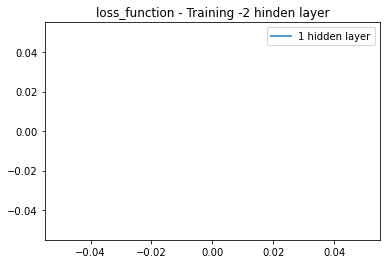

In [90]:
# Plot the loss function of the training results for the model
import matplotlib.pyplot as plt
plt.plot(model_1.history["loss"])
#plt.plot(model_2.history["loss"])
plt.title("loss_function - Training -2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

In [91]:
# # Reshape the features for the model
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [92]:
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

# Initial model setup
number_units = 8
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [93]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [94]:
# Summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 8)              320       
                                                                 
 dropout_3 (Dropout)         (None, 7, 8)              0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 8)              544       
                                                                 
 dropout_4 (Dropout)         (None, 7, 8)              0         
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [95]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=3, verbose=1)

Epoch 1/100
25/25 [==============================] - 9s 17ms/step - loss: 1.0386
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9755
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9185
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8042
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.6210
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.4735
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.4212
Epoch 8/100
25/25 [==============================] - 0s 14ms/step - loss: 0.3724
Epoch 9/100
25/25 [==============================] - 0s 14ms/step - loss: 0.4081
Epoch 10/100
25/25 [==============================] - 0s 14ms/step - loss: 0.3994
Epoch 11/100
25/25 [==============================] - 0s 14ms/step - loss: 0.3394
Epoch 12/100
25/25 [==============================] - 0s 15ms/step - loss: 0.3675
Epoch 13/100
25/25 [=====

In [96]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.8378706574440002

In [97]:
# Make some predictions
predicted = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [98]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [99]:
# Create a DataFrame of Real and Predicted values
assets = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = combined_asset_data.index[-len(real_prices): ]) 
assets.head()

,Real,Predicted
Date,,
2021-10-25,459.250000,424.225586
2021-11-01,468.529999,423.091675
2021-11-08,467.269989,421.524323
2021-11-15,468.890015,421.263123
2021-11-22,458.970001,411.127319


<AxesSubplot:title={'center':'Actual Vs. Predicted SPY Prices'}, xlabel='Date'>

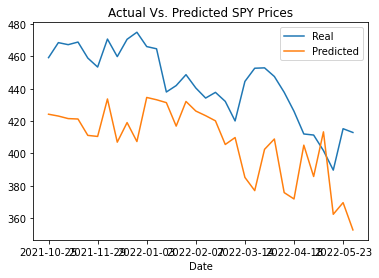

In [102]:
# Plot the real vs predicted values as a line chart
assets.plot(title="Actual Vs. Predicted SPY Prices")